#### CSC 180  Intelligent Systems (Spring 2021)

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento

## Lab 13： Building Expert Systems using Fuzzy Inference and skfuzzy API


## Install the skfuzzy  API

pip install scikit-fuzzy

##  The Tipping Problem


The 'tipping problem' is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.


### Let's create a fuzzy control system which models how you might choose to tip at a restaurant.  When tipping, you consider the service and food quality rated between 0 and 10.  You use this to leave a tip of between 0 and 25%.

### We would formulate this problem as:

* Antecednets (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
      
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
      
* Rules on Fuzzy numbers
   - IF the *service* was good  *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
     
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.



## First, let's define fuzzy numbers

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline 

In [2]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

trimf():  Triangular-shaped built-in membership function.

Syntax: y = trimf(x,[a b c])

The parameters a and c locate the "feet" of the triangle and the parameter c locates the peak.

In [3]:
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

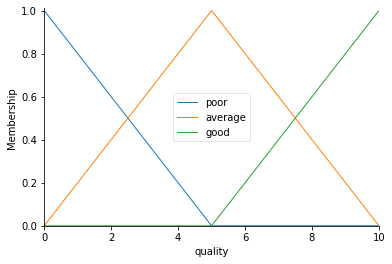

In [4]:
# You can see how these look with .view()
quality.view()

### Now we have defined three fuzzy numbers for quality on a scale of 0 to 10

In [5]:
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

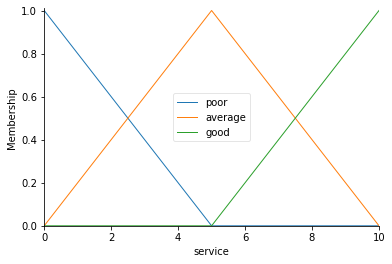

In [6]:
# You can see how these look with .view()
service.view()

### Now we have defined three fuzzy numbers for service on a scale of 0 to 10

In [7]:
### So far we have defined three fuzzy numbers for quality on a scale of 0 to 10# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

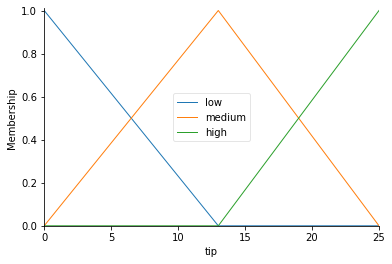

In [8]:
# You can see how these look with .view()
tip.view()

### Similarly we have defined three fuzzy numbers for tip on a scale of 0 to 10

## Second, define fuzzy rules

### Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider 3 simple rules:

#### 1. If the food is poor OR the service is poor, then the tip will be low<br/>
#### 2. If the service is average, then the tip will be medium<br/>
#### 3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable
tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [9]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])


## Third, model creation and simulation

#### Now that we have our rules defined, we can simply create a control system via:

In [10]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a ControlSystemSimulation. 
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. We would create another 
ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the 
cafe because the inputs would be different.


In [11]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

### We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [12]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

### Once computed, we can view the result as well as visualize it.

19.847607361963192


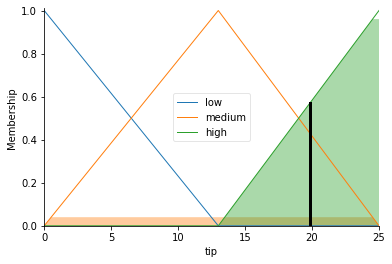

In [13]:
print(tipping.output['tip'])

tip.view(sim=tipping)

### The resulting suggested tip is 19.85%.

## References:
    
https://pythonhosted.org/scikit-fuzzy/